<a href="https://colab.research.google.com/github/eubielaraujo/Confusion_Matrix/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3341 - loss: 1.7955 - val_accuracy: 0.5102 - val_loss: 1.3360
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.5692 - loss: 1.2132 - val_accuracy: 0.6253 - val_loss: 1.0618
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6285 - loss: 1.0477 - val_accuracy: 0.6286 - val_loss: 1.0489
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6738 - loss: 0.9339 - val_accuracy: 0.6546 - val_loss: 0.9702
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6982 - loss: 0.8571 - val_accuracy: 0.6808 - val_loss: 0.9151
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7201 - loss: 0.7989 - val_accuracy: 0.6835 - val_loss: 0.9027
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7366 - loss: 0.7543 - val_accuracy: 0.6982 - val_loss: 0.8852
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7493 -

In [ ]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

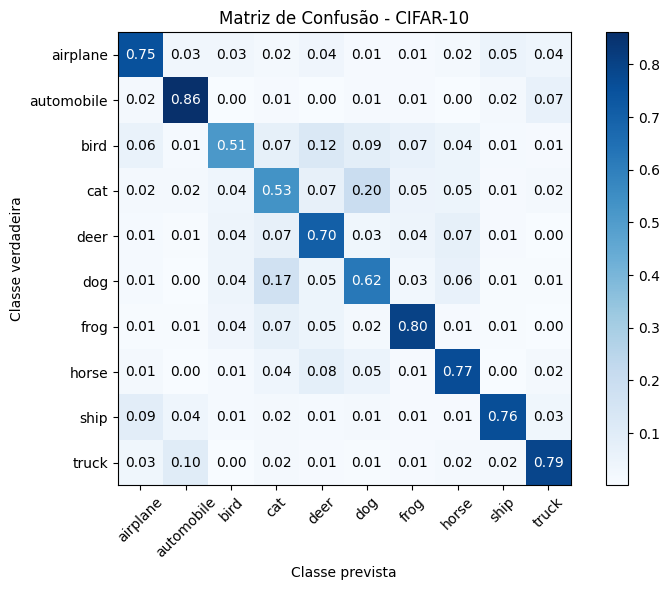

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - CIFAR-10")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if cm_norm[i, j] > thresh else "black")

plt.ylabel("Classe verdadeira")
plt.xlabel("Classe prevista")
plt.tight_layout()
plt.show()

In [ ]:
sens = cm[0,0] / (cm[0,0] + cm[0,1])
esp = cm[1,1] / (cm[1,0] + cm[1,1])
acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
prec = cm[0,0] / (cm[0,0] + cm[1,0])
f1 = 2 * (prec * sens) / (prec + sens)

print(f"Sensibilidade: {sens} \nEspecificidade: {esp} \nAcurácia: {acc} \nPrecisão: {prec} \nF-score: {f1}")



Sensibilidade: 0.9628681177976952 
Especificidade: 0.9817559863169898 
Acurácia: 0.9728588661037394 
Precisão: 0.9791666666666666 
F-score: 0.970948999354422
